In [1]:
import csv
import re
from collections import defaultdict
import glob
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
import scipy
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
%config InlineBackend.figure_format = 'retina'

In [3]:
# Populations per million persons
pop_araba = 326000/1e6
pop_bizkaia = 1135000/1e6
pop_gipuzkoa = 710000/1e6
pop_nafarroa = 643866/1e6
pop_espainia = 46700000/1e6
pop_madrid = 6550000/1e6
pop_andalucia = 8410000/1e6
pop_aragon = 1313000/1e6
pop_asturias = 1028000/1e6
pop_baleares = 1167000/1e6
pop_canarias = 2153000/1e6
pop_cantabria = 581294/1e6
pop_castillal = 2419000/1e6
pop_castillam = 2033000/1e6
pop_catalunya = 7489000/1e6

In [11]:
# Euskal Herria
re_araba = re.compile("Araba")
re_bizkaia = re.compile("Bizkaia")
re_gipuzkoa = re.compile("Gipuzkoa")
re_nafarroa = re.compile("Nafarroa")
# Comparison
re_espainia = re.compile("Espainia")
re_madrid = re.compile("Madrid")
# Spanish regions
re_andalucia = re.compile("Andaluzia")
re_aragon = re.compile("Aragoi")
re_asturias = re.compile("Asturias")
re_baleares = re.compile("Balearak")
re_canarias = re.compile("Canarias")
re_cantabria = re.compile("Cantabria")
re_castillal = re.compile("Castilla-L")
re_castillam = re.compile("Castilla-M")
re_catalunya = re.compile("Catalu")

# Hildakoak
h_araba = []
h_bizkaia = []
h_gipuzkoa = []
h_nafarroa = []
h_espainia = []
h_madrid = []
h_andalucia = []
h_aragon = []
h_asturias = []
h_baleares = []
h_canarias = []
h_cantabria = []
h_castillal = []
h_castillam = []
h_catalunya = []
# Positiboak
si_araba = []
si_bizkaia = []
si_gipuzkoa = []
si_nafarroa = []
# Positiboak milloiko
sp_araba = []
sp_bizkaia = []
sp_gipuzkoa = []
sp_nafarroa = []
sp_espainia = []
sp_madrid = []
sp_andalucia = []
sp_aragon = []
sp_asturias = []
sp_baleares = []
sp_canarias = []
sp_cantabria = []
sp_castillal = []
sp_castillam = []
sp_catalunya = []

for day in ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15",\
            "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30",\
            "31", "32", "33", "34", "35", "36"]:
    with open("data/%s.csv"%day) as f:
        filelines = f.readlines()
    
        # We look for the number of deaths per province
        for line in filelines:
            if re_araba.search(line):
                h_araba.append(float(line.split()[1]))
                si_araba.append(float(line.split()[2]))
                sp_araba.append(float(line.split()[5]))
            if re_bizkaia.search(line):
                h_bizkaia.append(float(line.split()[1]))
                si_bizkaia.append(float(line.split()[2]))
                sp_bizkaia.append(float(line.split()[5]))
            if re_gipuzkoa.search(line):
                h_gipuzkoa.append(float(line.split()[1]))
                si_gipuzkoa.append(float(line.split()[2]))
                sp_gipuzkoa.append(float(line.split()[5]))
            if re_nafarroa.search(line):
                h_nafarroa.append(float(line.split()[1]))
                si_nafarroa.append(float(line.split()[2]))
                sp_nafarroa.append(float(line.split()[5]))
            if re_espainia.search(line):
                h_espainia.append(float(line.split()[1]))
                sp_espainia.append(float(line.split()[5]))
            if re_madrid.search(line):
                h_madrid.append(float(line.split()[1]))
                sp_madrid.append(float(line.split()[5]))
            if re_andalucia.search(line):
                h_andalucia.append(float(line.split()[1]))
                sp_andalucia.append(float(line.split()[5]))
            if re_aragon.search(line):
                h_aragon.append(float(line.split()[1]))
                sp_aragon.append(float(line.split()[5]))
            if re_asturias.search(line):
                h_asturias.append(float(line.split()[1]))
                sp_asturias.append(float(line.split()[5]))
            if re_baleares.search(line):
                h_baleares.append(float(line.split()[1]))
                sp_baleares.append(float(line.split()[5]))
            if re_canarias.search(line):
                h_canarias.append(float(line.split()[1]))
                sp_canarias.append(float(line.split()[5]))
            if re_cantabria.search(line):
                h_cantabria.append(float(line.split()[1]))
                sp_cantabria.append(float(line.split()[5]))
            if re_castillal.search(line):
                h_castillal.append(float(line.split()[1]))
                sp_castillal.append(float(line.split()[5]))
            if re_castillam.search(line):
                h_castillam.append(float(line.split()[1]))
                sp_castillam.append(float(line.split()[5]))
            if re_catalunya.search(line):
                h_catalunya.append(float(line.split()[1]))
                sp_catalunya.append(float(line.split()[5]))

In [5]:
# Find the first day in which there were at least ten deahts
day_araba = next(x for x, val in enumerate(h_araba) if val > 10.0)
day_bizkaia = next(x for x, val in enumerate(h_bizkaia) if val > 10.0)
day_gipuzkoa = next(x for x, val in enumerate(h_gipuzkoa) if val > 10.0)
day_nafarroa = next(x for x, val in enumerate(h_nafarroa) if val > 10.0)
day_andalucia = next(x for x, val in enumerate(h_andalucia) if val > 10.0)
day_aragon = next(x for x, val in enumerate(h_aragon) if val > 10.0)
day_asturias = next(x for x, val in enumerate(h_asturias) if val > 10.0)
day_baleares = next(x for x, val in enumerate(h_baleares) if val > 10.0)
day_canarias = next(x for x, val in enumerate(h_canarias) if val > 10.0)
day_cantabria = next(x for x, val in enumerate(h_cantabria) if val > 10.0)
day_castillal = next(x for x, val in enumerate(h_castillal) if val > 10.0)
day_castillam = next(x for x, val in enumerate(h_castillam) if val > 10.0)
day_catalunya = next(x for x, val in enumerate(h_catalunya) if val > 10.0)

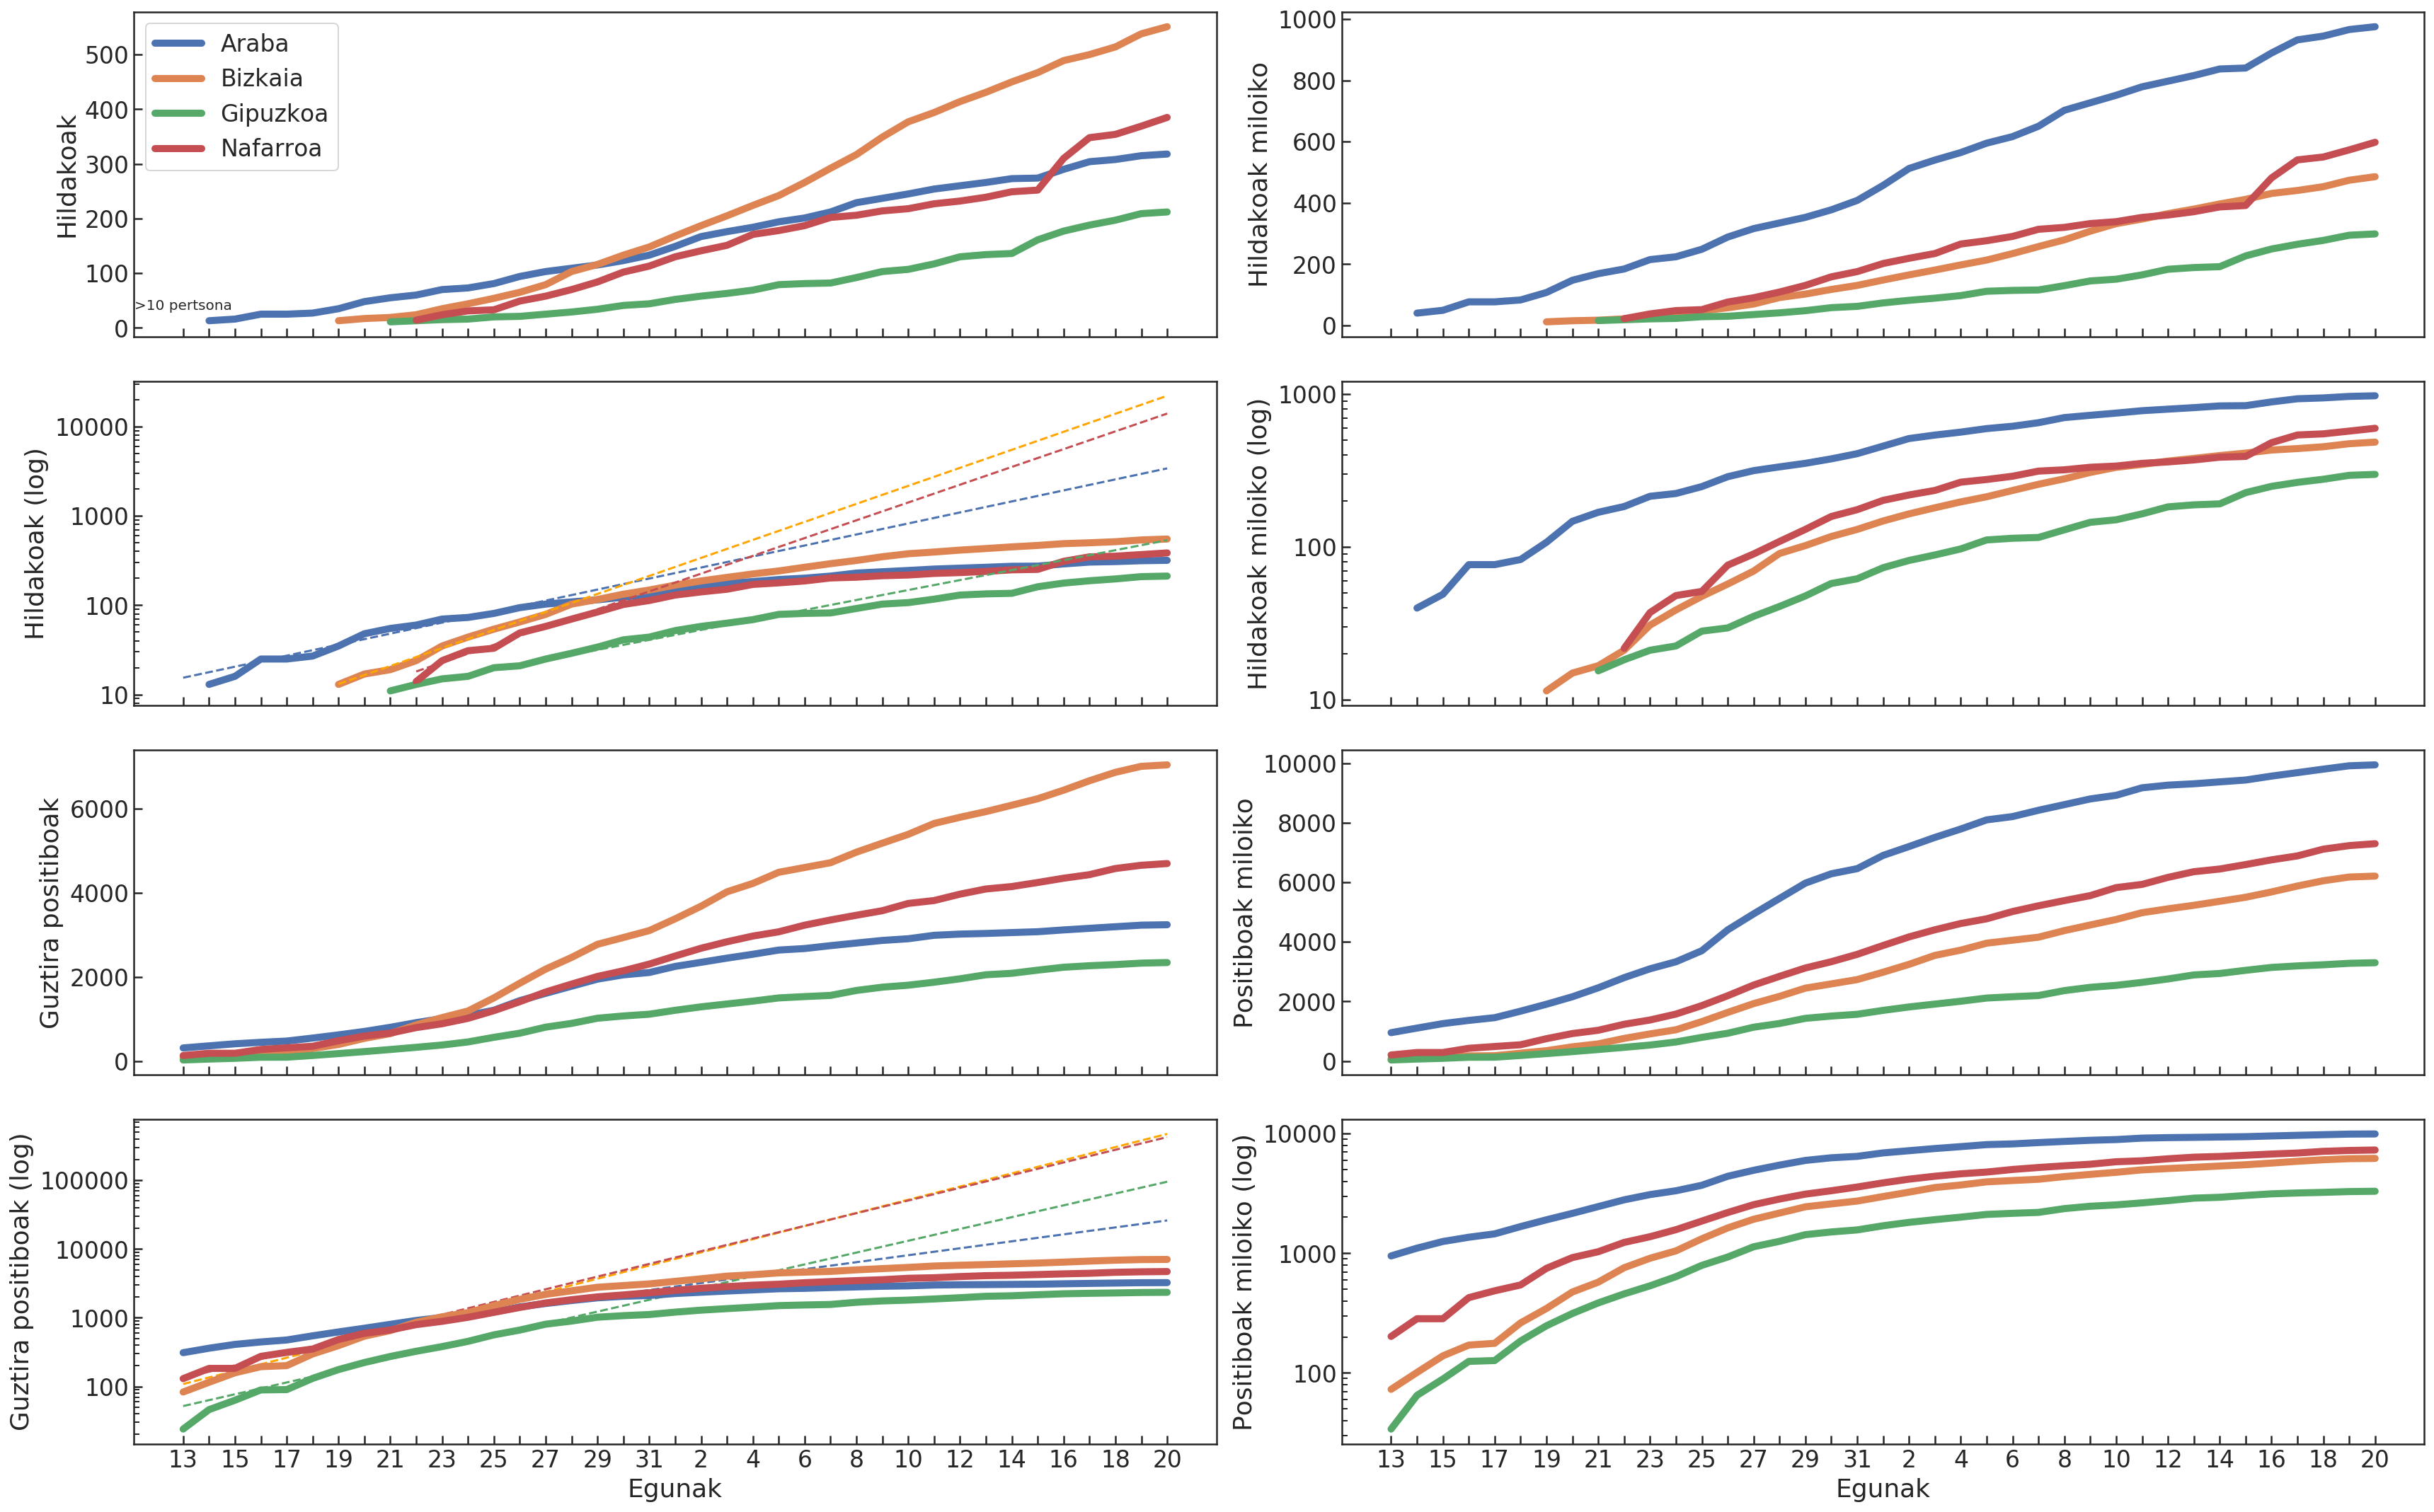

In [7]:
fig, ax = plt.subplots(4,2, figsize=(24,15), sharex=True)
ax = ax.flatten()

l = len(h_araba)
egunak_martxoak = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
l2 = len(egunak_martxoak)
egunak_apirila = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
egunak_apirila_2 = [31 + x for x in egunak_apirila]

# Deaths per person (it is calculated because it is not in the data)
hp_araba = [x/pop_araba for x in h_araba]
hp_bizkaia = [x/pop_bizkaia for x in h_bizkaia]
hp_gipuzkoa = [x/pop_gipuzkoa for x in h_gipuzkoa]
hp_nafarroa = [x/pop_nafarroa for x in h_nafarroa]

# Exponential fitting
# Death cases
x = np.linspace(0,l-1,l)
yh = h_araba[:14]
Ah,Bh = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:14], yh, p0=(1,2.5))
yh1 = h_bizkaia[:14]
Ah1,Bh1 = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[6:14], yh1[6:14], p0=(1,2.5))
yh2 = h_gipuzkoa[:14]
Ah2,Bh2 = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[8:14], yh2[8:14], p0=(1,2.5))
yh3 = h_nafarroa[:16]
Ah3,Bh3 = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[9:16], yh3[9:16], p0=(1,2.5))
# Positive cases
y = si_araba[:16]
A,B = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:16], y[:16], p0=(1,2.5))
y1 = si_bizkaia[:13]
A1,B1 = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:13], y1[:13], p0=(1,2.5))
y2 = si_gipuzkoa[:14]
A2,B2 = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:14], y2[:14], p0=(1,2.5))
y3 = si_nafarroa[:8]
A3,B3 = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:8], y3[:8], p0=(1,2.5))

if (len(h_araba) == len(h_bizkaia) and len(h_araba) == len(h_gipuzkoa) == len(h_nafarroa)):
    ax[0].plot(egunak_martxoak[day_araba:]+egunak_apirila_2[0:l-l2], h_araba[day_araba:], linewidth=5, label='Araba')
    ax[0].plot(egunak_martxoak[day_bizkaia:l]+egunak_apirila_2[0:l-l2], h_bizkaia[day_bizkaia:], linewidth=5, label='Bizkaia')
    ax[0].plot(egunak_martxoak[day_gipuzkoa:l]+egunak_apirila_2[0:l-l2], h_gipuzkoa[day_gipuzkoa:], linewidth=5, label='Gipuzkoa')
    ax[0].plot(egunak_martxoak[day_nafarroa:l]+egunak_apirila_2[0:l-l2], h_nafarroa[day_nafarroa:], linewidth=5, label='Nafarroa')
    ax[0].text(h_bizkaia[day_bizkaia], h_bizkaia[day_bizkaia]+20, ">10 pertsona", ha="center")
    ax[1].plot(egunak_martxoak[day_araba:l]+egunak_apirila_2[0:l-l2], hp_araba[day_araba:], linewidth=5)
    ax[1].plot(egunak_martxoak[day_bizkaia:l]+egunak_apirila_2[0:l-l2], hp_bizkaia[day_bizkaia:], linewidth=5)
    ax[1].plot(egunak_martxoak[day_gipuzkoa:l]+egunak_apirila_2[0:l-l2], hp_gipuzkoa[day_gipuzkoa:], linewidth=5)
    ax[1].plot(egunak_martxoak[day_nafarroa:l]+egunak_apirila_2[0:l-l2], hp_nafarroa[day_nafarroa:], linewidth=5)
    ax[2].plot(egunak_martxoak[day_araba:l]+egunak_apirila_2[0:l-l2], h_araba[day_araba:], linewidth=5)
    ax[2].plot(egunak_martxoak[day_bizkaia:l]+egunak_apirila_2[0:l-l2], h_bizkaia[day_bizkaia:], linewidth=5)
    ax[2].plot(egunak_martxoak[day_gipuzkoa:l]+egunak_apirila_2[0:l-l2], h_gipuzkoa[day_gipuzkoa:], linewidth=5)
    ax[2].plot(egunak_martxoak[day_nafarroa:l]+egunak_apirila_2[0:l-l2], h_nafarroa[day_nafarroa:], linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               Ah[0]*np.exp(Ah[1]*np.linspace(0,l-1,l)), 'b--')
    ax[2].plot(egunak_martxoak[6:l]+egunak_apirila_2[0:l-l2],\
               Ah1[0]*np.exp(Ah1[1]*np.linspace(6,l-1,l-6)), '--', color='orange')
    ax[2].plot(egunak_martxoak[8:l]+egunak_apirila_2[0:l-l2],\
               Ah2[0]*np.exp(Ah2[1]*np.linspace(8,l-1,l-8)), 'g--')
    ax[2].plot(egunak_martxoak[9:l]+egunak_apirila_2[0:l-l2],\
               Ah3[0]*np.exp(Ah3[1]*np.linspace(9,l-1,l-9)), 'r--')
    ax[3].plot(egunak_martxoak[day_araba:l]+egunak_apirila_2[0:l-l2], hp_araba[day_araba:], linewidth=5)
    ax[3].plot(egunak_martxoak[day_bizkaia:l]+egunak_apirila_2[0:l-l2], hp_bizkaia[day_bizkaia:], linewidth=5)
    ax[3].plot(egunak_martxoak[day_gipuzkoa:l]+egunak_apirila_2[0:l-l2], hp_gipuzkoa[day_gipuzkoa:], linewidth=5)
    ax[3].plot(egunak_martxoak[day_nafarroa:l]+egunak_apirila_2[0:l-l2], hp_nafarroa[day_nafarroa:], linewidth=5)
    ax[4].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_araba, linewidth=5)
    ax[4].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_bizkaia, linewidth=5)
    ax[4].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_gipuzkoa, linewidth=5)
    ax[4].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_nafarroa, linewidth=5)
    ax[5].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_araba, linewidth=5)
    ax[5].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_bizkaia, linewidth=5)
    ax[5].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_gipuzkoa, linewidth=5)
    ax[5].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_nafarroa, linewidth=5)
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A[0]*np.exp(A[1]*np.linspace(0,l-1,l)), 'b--')
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A1[0]*np.exp(A1[1]*np.linspace(0,l-1,l)), '--', color='orange')
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A2[0]*np.exp(A2[1]*np.linspace(0,l-1,l)), 'g--')
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A3[0]*np.exp(A3[1]*np.linspace(0,l-1,l)), 'r--')
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_araba, linewidth=5)
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_bizkaia, linewidth=5)
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_gipuzkoa, linewidth=5)
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_nafarroa, linewidth=5)
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_araba, linewidth=5)
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_bizkaia, linewidth=5)
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_gipuzkoa, linewidth=5)
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_nafarroa, linewidth=5)

ax[0].legend(loc=0)
ax[0].set_ylabel('Hildakoak')
ax[1].set_ylabel('Hildakoak miloiko')
ax[2].set_yscale('log')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[2].set_ylabel('Hildakoak (log)')
ax[3].set_yscale('log')
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[3].set_ylabel('Hildakoak miloiko (log)')
ax[4].set_ylabel('Guztira positiboak')
ax[5].set_ylabel('Positiboak miloiko')
ax[6].set_yscale('log')
ax[6].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[6].set_ylabel('Guztira positiboak (log)')
ax[6].set_xlabel('Egunak')
ax[7].set_yscale('log')
ax[7].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[7].set_ylabel('Positiboak miloiko (log)')
ax[7].set_xlabel('Egunak')
ax[7].set_xticklabels(egunak_martxoak+egunak_apirila[0:l-l2])
ax[7].set_xticks(egunak_martxoak+egunak_apirila_2[0:l-l2])
#Make every two variables visible
for label in ax[6].xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
for label in ax[7].xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

plt.tight_layout()

fig.savefig('herrialdeak.png', facecolor='w', transparent=False)

In [6]:
if (Ah[0]*np.exp(Ah[1]*(l-1)) >= pop_araba*1e6 and Ah1[0]*np.exp(Ah1[1]*(l-1)) >= pop_bizkaia*1e6 and\
    Ah2[0]*np.exp(Ah2[1]*(l-1)) >= pop_gipuzkoa*1e6 and Ah3[0]*np.exp(Ah3[1]*(l-1)) >= pop_nafarroa*1e6):
    print("Kontuz! Hildakoak proiekzioan populazioa baiona geiago daude")
if (A[0]*np.exp(A[1]*(l-1)) >= pop_araba*1e6 and A1[0]*np.exp(A1[1]*(l-1)) >= pop_bizkaia*1e6 and\
    A2[0]*np.exp(A2[1]*(l-1)) >= pop_gipuzkoa*1e6 and A3[0]*np.exp(A3[1]*(l-1)) >= pop_nafarroa*1e6):
    print("Kontuz! Positiboak proiekzioan populazioa baiona geiago daude")

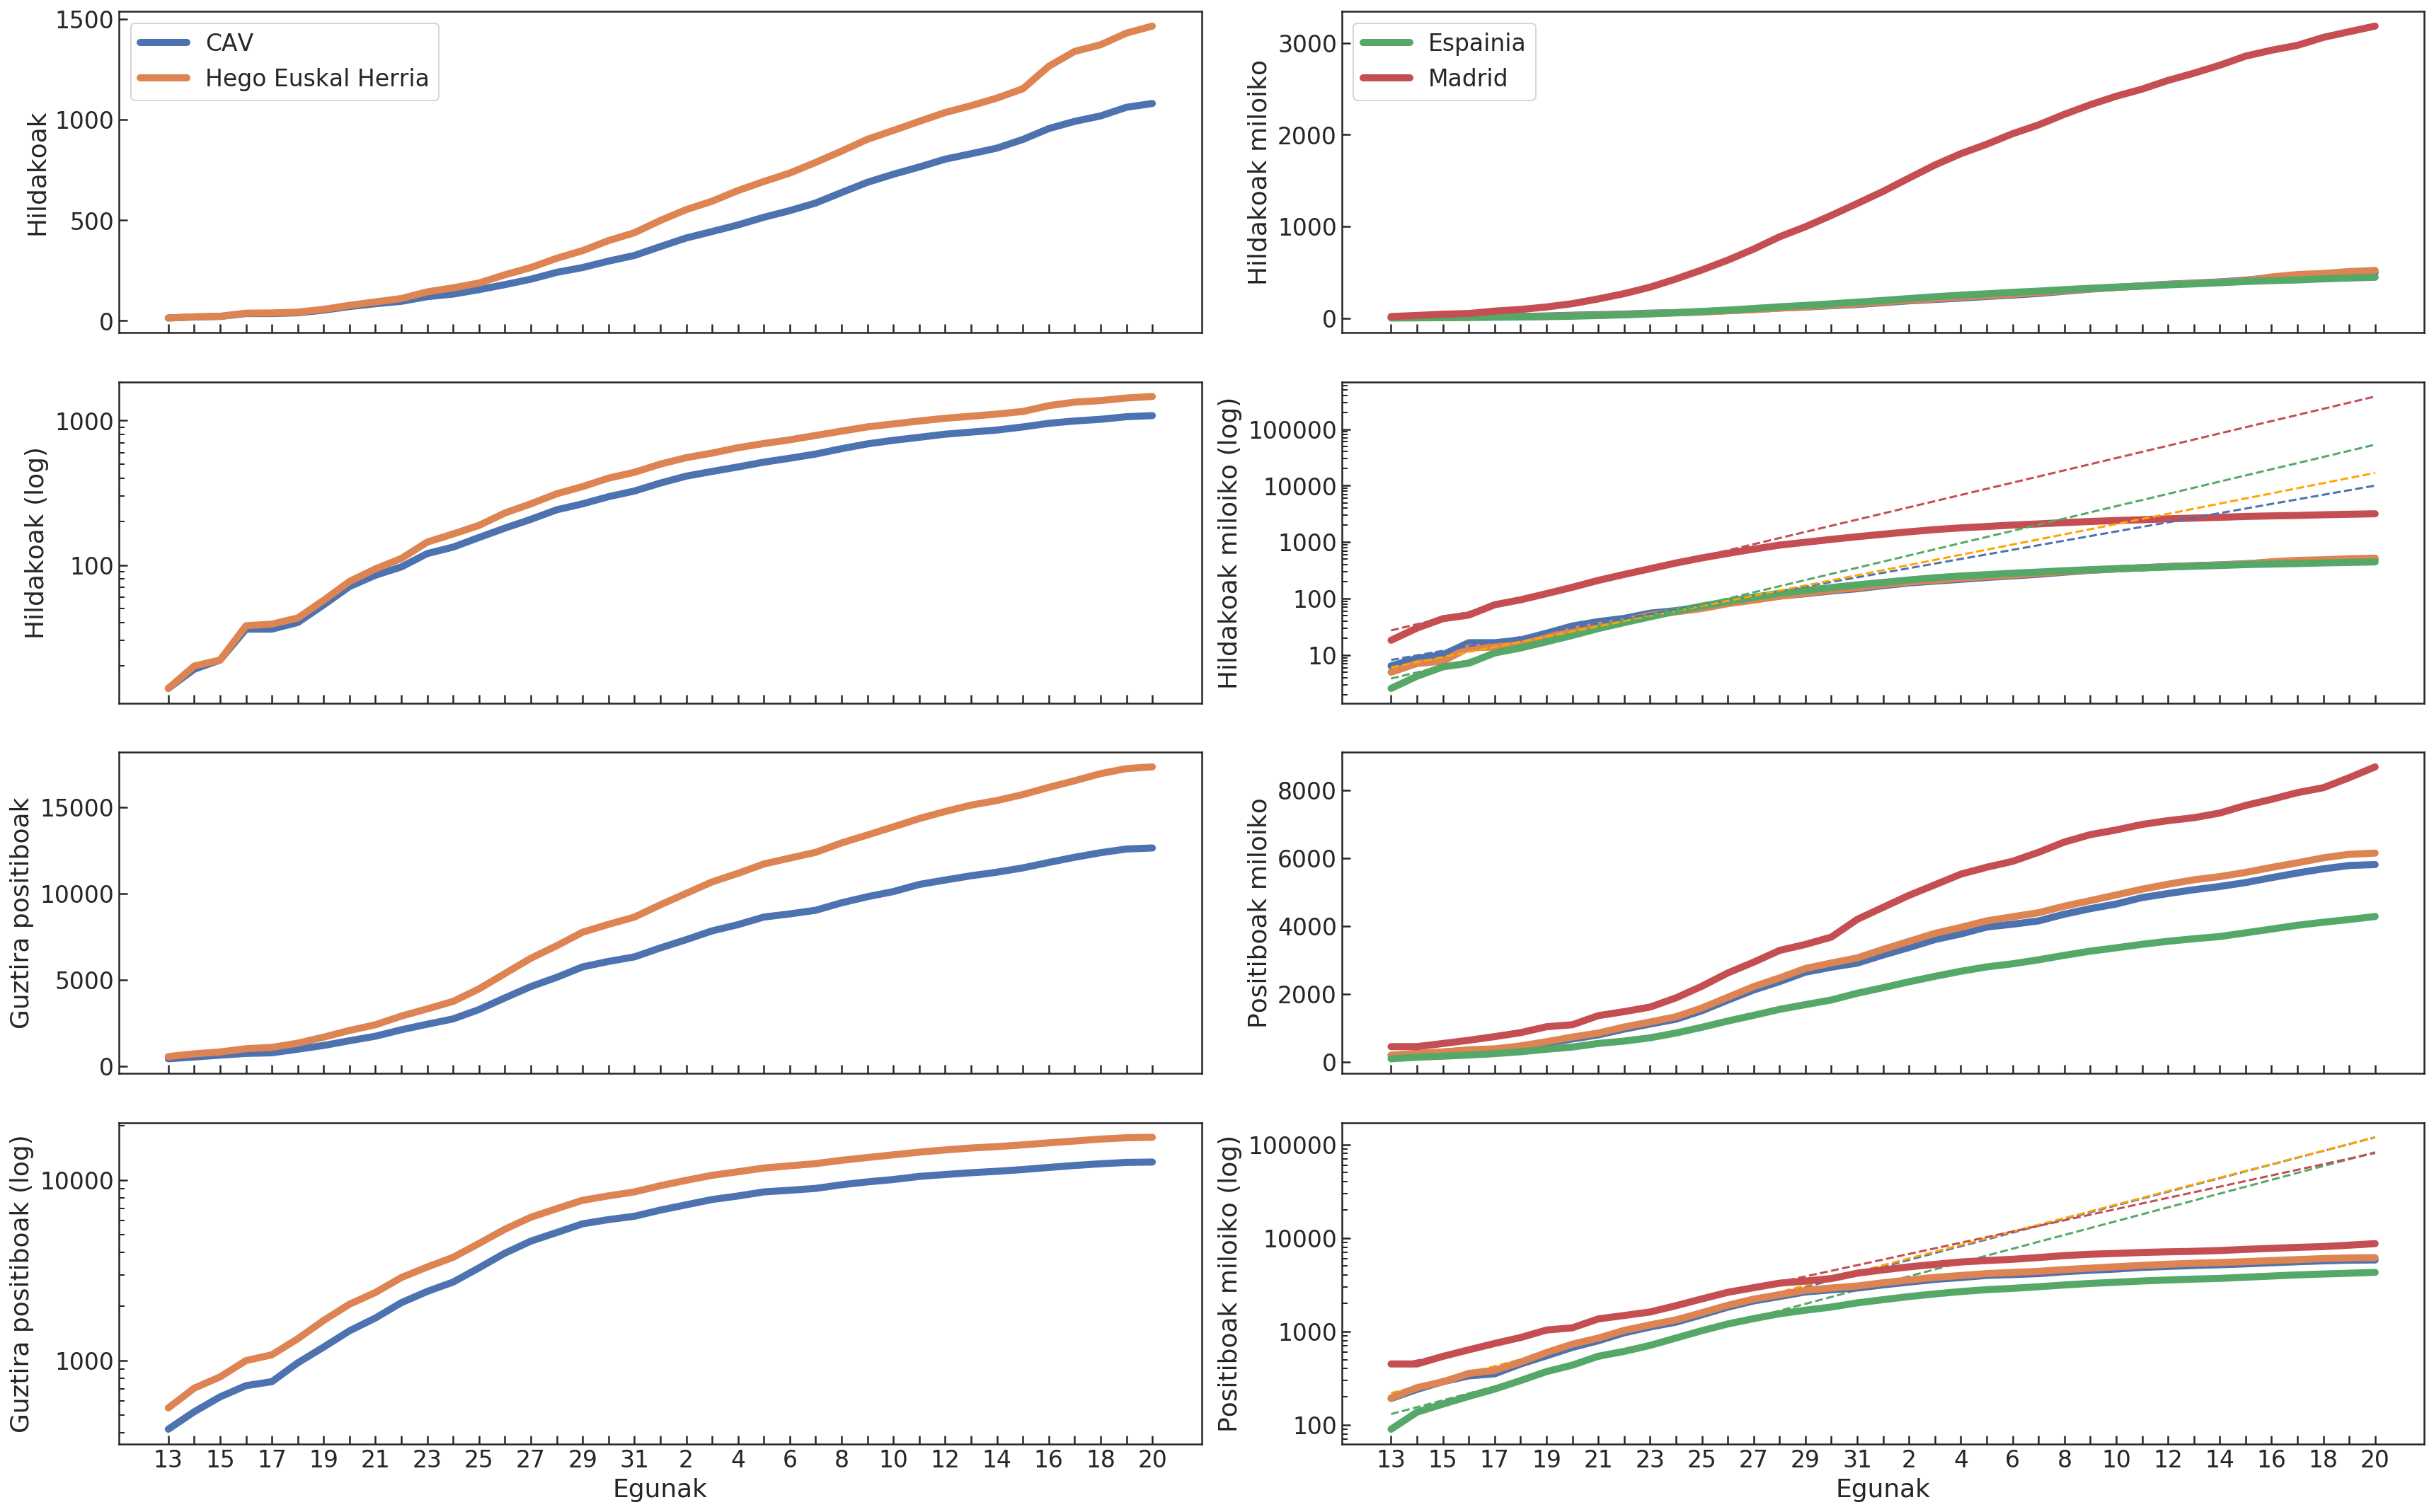

In [12]:
fig, ax = plt.subplots(4,2, figsize=(24,15), sharex=True)
ax = ax.flatten()

# Computation of the subtotals
h_cav = [x + y + z for x, y, z in zip(h_araba, h_bizkaia, h_gipuzkoa)]
h_heh = [x + y + z + a for x, y, z, a in zip(h_araba, h_bizkaia, h_gipuzkoa, h_nafarroa)]
si_cav = [x + y + z for x, y, z in zip(si_araba, si_bizkaia, si_gipuzkoa)]
si_heh = [x + y + z + a for x, y, z, a in zip(si_araba, si_bizkaia, si_gipuzkoa, si_nafarroa)]
sp_cav = [x/(pop_araba + pop_bizkaia + pop_gipuzkoa) for x in si_cav]
sp_heh = [x/(pop_araba + pop_bizkaia + pop_gipuzkoa + pop_nafarroa) for x in si_heh]

# Deaths per person (it is calculated because it is not in the data)
hp_cav = [x/(pop_araba + pop_bizkaia + pop_gipuzkoa) for x in h_cav]
hp_heh = [x/(pop_araba + pop_bizkaia + pop_gipuzkoa + pop_nafarroa) for x in h_heh]
hp_espainia = [x/pop_espainia for x in h_espainia]
hp_madrid = [x/pop_madrid for x in h_espainia]

# Exponential fitting
x = np.linspace(0,l-1,l)
# Death cases per million persons
y_hp = hp_cav[:12]
A_hp,B_hp = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:12], y_hp[:12], p0=(1,2.5))
y1_hp = hp_heh[:12]
A1_hp,B1_hp = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:12], y1_hp[:12], p0=(1,2.5))
y2_hp = hp_espainia[:12]
A2_hp,B2_hp = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:12], y2_hp[:12], p0=(1,2.5))
y3_hp = hp_madrid[:12]
A3_hp,B3_hp = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:12], y3_hp[:12], p0=(1,2.5))
# Positive per million persons
y_p = sp_cav[:15]
A_p,B_p = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:15], y_p[:15], p0=(1,2.5))
y1_p = sp_heh[:15]
A1_p,B1_p = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:15], y1_p[:15], p0=(1,2.5))
y2_p = sp_espainia[:15]
A2_p,B2_p = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:15], y2_p[:15], p0=(1,2.5))
y3_p = sp_madrid[:15]
A3_p,B3_p = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t), x[:15], y3_p[:15], p0=(1,2.5))

if (len(h_araba) == len(h_bizkaia) and len(h_araba) == len(h_gipuzkoa) == len(h_nafarroa)):
    ax[0].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], h_cav, linewidth=5, label='CAV')
    ax[0].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], h_heh, linewidth=5, label='Hego Euskal Herria')
    ax[1].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_cav, linewidth=5)
    ax[1].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_heh, linewidth=5)
    ax[1].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_espainia, linewidth=5, label='Espainia')
    ax[1].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_madrid, linewidth=5, label='Madrid')
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], h_cav, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], h_heh, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_cav, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_heh, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_espainia, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_madrid, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A_hp[0]*np.exp(A_hp[1]*np.linspace(0,l-1,l)), 'b--')
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A1_hp[0]*np.exp(A1_hp[1]*np.linspace(0,l-1,l)), '--', color='orange')
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A2_hp[0]*np.exp(A2_hp[1]*np.linspace(0,l-1,l)), 'g--')
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A3_hp[0]*np.exp(A3_hp[1]*np.linspace(0,l-1,l)), 'r--')
    ax[4].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_cav, linewidth=5)
    ax[4].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_heh, linewidth=5)
    ax[5].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_cav, linewidth=5)
    ax[5].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_heh, linewidth=5)
    ax[5].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_espainia, linewidth=5)
    ax[5].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_madrid, linewidth=5)
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_cav, linewidth=5)
    ax[6].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], si_heh, linewidth=5)
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A_p[0]*np.exp(A_p[1]*np.linspace(0,l-1,l)), 'b--')
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A1_p[0]*np.exp(A1_p[1]*np.linspace(0,l-1,l)), '--', color='orange')
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A2_p[0]*np.exp(A2_p[1]*np.linspace(0,l-1,l)), 'g--')
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2],\
               A3_p[0]*np.exp(A3_p[1]*np.linspace(0,l-1,l)), 'r--')
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_cav, linewidth=5)
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_heh, linewidth=5)
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_espainia, linewidth=5)
    ax[7].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_madrid, linewidth=5)

ax[0].legend(loc=0)
ax[0].set_ylabel('Hildakoak')
ax[1].legend(loc=0)
ax[1].set_ylabel('Hildakoak miloiko')
ax[2].set_yscale('log')
ax[2].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[2].set_ylabel('Hildakoak (log)')
ax[3].set_yscale('log')
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[3].set_ylabel('Hildakoak miloiko (log)')
ax[4].set_ylabel('Guztira positiboak')
ax[5].set_ylabel('Positiboak miloiko')
ax[6].set_yscale('log')
ax[6].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[6].set_ylabel('Guztira positiboak (log)')
ax[6].set_xlabel('Egunak')
ax[7].set_yscale('log')
ax[7].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[7].set_ylabel('Positiboak miloiko (log)')
ax[7].set_xlabel('Egunak')
ax[7].set_xticklabels(egunak_martxoak+egunak_apirila[0:l-l2])
ax[7].set_xticks(egunak_martxoak+egunak_apirila_2[0:l-l2])
#Make every two variables visible
for label in ax[6].xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
for label in ax[7].xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

plt.tight_layout()

fig.savefig('generalak.png', facecolor='w', transparent=False)

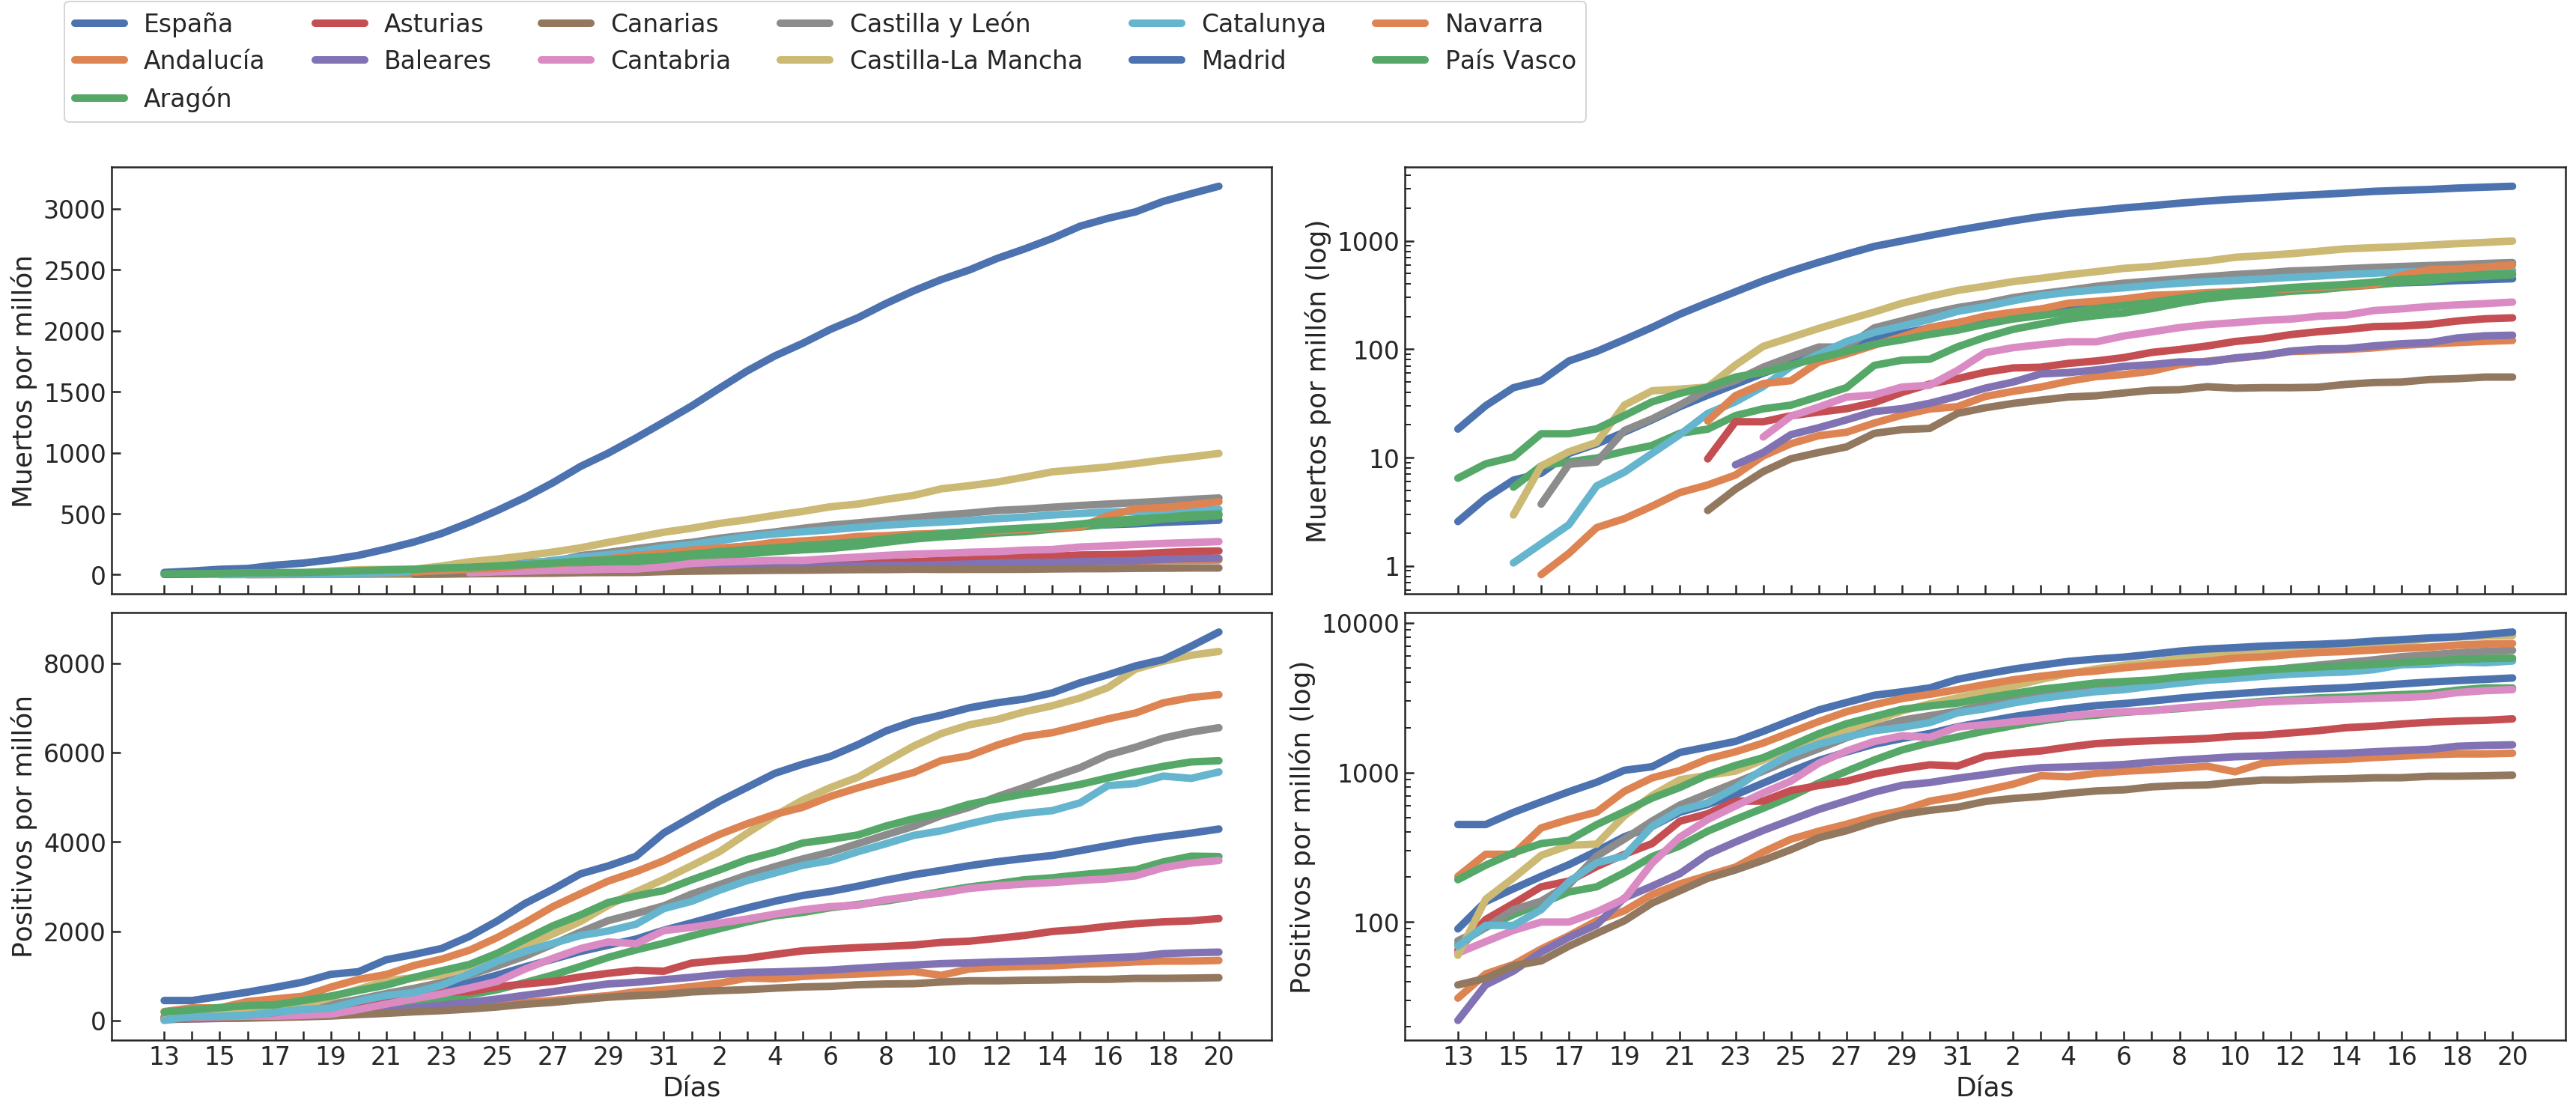

In [13]:
fig, ax = plt.subplots(2,2, figsize=(24,9), sharex=True)
ax = ax.flatten()

# Deaths per person (it is calculated because it is not in the data)
hp_espainia = [x/pop_espainia for x in h_espainia]
hp_madrid = [x/pop_madrid for x in h_espainia]
hp_andalucia = [x/pop_andalucia for x in h_andalucia]
hp_aragon = [x/pop_aragon for x in h_aragon]
hp_asturias = [x/pop_asturias for x in h_asturias]
hp_baleares = [x/pop_baleares for x in h_baleares]
hp_canarias = [x/pop_canarias for x in h_canarias]
hp_cantabria = [x/pop_cantabria for x in h_cantabria]
hp_castillal = [x/pop_castillal for x in h_castillal]
hp_castillam = [x/pop_castillam for x in h_castillam]
hp_catalunya = [x/pop_catalunya for x in h_catalunya]

if (len(h_araba) == len(h_bizkaia) and len(h_araba) == len(h_gipuzkoa) == len(h_nafarroa)):
    ax[0].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_espainia, linewidth=5)
    ax[0].plot(egunak_martxoak[day_andalucia:l]+egunak_apirila_2[0:l-l2], hp_andalucia[day_andalucia-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[day_aragon:l]+egunak_apirila_2[0:l-l2], hp_aragon[day_aragon-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[day_asturias:l]+egunak_apirila_2[0:l-l2], hp_asturias[day_asturias-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[day_baleares:l]+egunak_apirila_2[0:l-l2], hp_baleares[day_baleares-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[day_canarias:l]+egunak_apirila_2[0:l-l2], hp_canarias[day_canarias-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[day_cantabria:l]+egunak_apirila_2[0:l-l2], hp_cantabria[day_cantabria-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[day_castillal:l]+egunak_apirila_2[0:l-l2], hp_castillal[day_castillal-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[day_castillam:l]+egunak_apirila_2[0:l-l2], hp_castillam[day_castillam-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[day_catalunya:l]+egunak_apirila_2[0:l-l2], hp_catalunya[day_catalunya-1:], linewidth=5)
    ax[0].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_madrid, linewidth=5)
    ax[0].plot(egunak_martxoak[day_nafarroa:l]+egunak_apirila_2[0:l-l2], hp_nafarroa[day_nafarroa:], linewidth=5)
    ax[0].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_cav, linewidth=5)
    ########################
    ax[1].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_espainia, linewidth=5, label='España')
    ax[1].plot(egunak_martxoak[day_andalucia:l]+egunak_apirila_2[0:l-l2], hp_andalucia[day_andalucia-1:], linewidth=5, label='Andalucía')
    ax[1].plot(egunak_martxoak[day_aragon:l]+egunak_apirila_2[0:l-l2], hp_aragon[day_aragon-1:], linewidth=5, label='Aragón')
    ax[1].plot(egunak_martxoak[day_asturias:l]+egunak_apirila_2[0:l-l2], hp_asturias[day_asturias-1:], linewidth=5, label='Asturias')
    ax[1].plot(egunak_martxoak[day_baleares:l]+egunak_apirila_2[0:l-l2], hp_baleares[day_baleares-1:], linewidth=5, label='Baleares')
    ax[1].plot(egunak_martxoak[day_canarias:l]+egunak_apirila_2[0:l-l2], hp_canarias[day_canarias-1:], linewidth=5, label='Canarias')
    ax[1].plot(egunak_martxoak[day_cantabria:l]+egunak_apirila_2[0:l-l2], hp_cantabria[day_cantabria-1:], linewidth=5, label='Cantabria')
    ax[1].plot(egunak_martxoak[day_castillal:l]+egunak_apirila_2[0:l-l2], hp_castillal[day_castillal-1:], linewidth=5, label='Castilla y León')
    ax[1].plot(egunak_martxoak[day_castillam:l]+egunak_apirila_2[0:l-l2], hp_castillam[day_castillam-1:], linewidth=5, label='Castilla-La Mancha')
    ax[1].plot(egunak_martxoak[day_catalunya:l]+egunak_apirila_2[0:l-l2], hp_catalunya[day_catalunya-1:], linewidth=5, label='Catalunya')
    ax[1].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_madrid, linewidth=5, label='Madrid')
    ax[1].plot(egunak_martxoak[day_nafarroa:l]+egunak_apirila_2[0:l-l2], hp_nafarroa[day_nafarroa:], linewidth=5, label='Navarra')
    ax[1].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], hp_cav, linewidth=5, label='País Vasco')
    ########################
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_espainia, linewidth=5)
    # We add a trick to estimate a possible number of positives in the missing day (the first)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_andalucia[0]-(sp_andalucia[2]-sp_andalucia[1])]+sp_andalucia, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_aragon[0]-(sp_aragon[2]-sp_aragon[1])]+sp_aragon, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_asturias[0]-(sp_asturias[2]-sp_asturias[1])]+sp_asturias, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_baleares[0]-(sp_baleares[2]-sp_baleares[1])]+sp_baleares, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_canarias[0]-(sp_canarias[3]-sp_canarias[1])]+sp_canarias, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_cantabria[0]-(sp_cantabria[3]-sp_cantabria[1])]+sp_cantabria, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_castillal[0]-(sp_castillal[3]-sp_castillal[1])]+sp_castillal, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_castillam[0]-(sp_castillam[3]-sp_castillam[1])]+sp_castillam, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_catalunya[0]-(sp_catalunya[3]-sp_catalunya[1])]+sp_catalunya, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_madrid, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_nafarroa, linewidth=5)
    ax[2].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_cav, linewidth=5)
    ########################
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_espainia, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_andalucia[0]-(sp_andalucia[2]-sp_andalucia[1])]+sp_andalucia, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_aragon[0]-(sp_aragon[2]-sp_aragon[1])]+sp_aragon, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_asturias[0]-(sp_asturias[2]-sp_asturias[1])]+sp_asturias, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_baleares[0]-(sp_baleares[2]-sp_baleares[1])]+sp_baleares, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_canarias[0]-(sp_canarias[2]-sp_canarias[1])]+sp_canarias, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_cantabria[0]-(sp_cantabria[2]-sp_cantabria[1])]+sp_cantabria, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_castillal[0]-(sp_castillal[2]-sp_castillal[1])]+sp_castillal, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_castillam[0]-(sp_castillam[2]-sp_castillam[1])]+sp_castillam, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], [sp_catalunya[0]-(sp_catalunya[2]-sp_catalunya[1])]+sp_catalunya, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_madrid, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_nafarroa, linewidth=5)
    ax[3].plot(egunak_martxoak[:l]+egunak_apirila_2[0:l-l2], sp_cav, linewidth=5)

ax[0].set_ylabel('Muertos por millón')
ax[1].set_yscale('log')
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1].set_ylabel('Muertos por millón (log)')
ax[2].set_ylabel('Positivos por millón')
ax[2].set_xlabel('Días')
ax[3].set_yscale('log')
ax[3].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[3].set_ylabel('Positivos por millón (log)')
ax[3].set_xlabel('Días')
ax[3].set_xticklabels(egunak_martxoak+egunak_apirila[0:l-l2])
ax[3].set_xticks(egunak_martxoak+egunak_apirila_2[0:l-l2])
#Make every two variables visible
for label in ax[2].xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
for label in ax[3].xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, bbox_to_anchor=(0.025,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=6)
    
plt.tight_layout()

fig.savefig('comunidades_autonomas.png', facecolor='w', transparent=False, bbox_inches='tight')